In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from scipy.stats import beta
import pandas as pd

In [2]:
D = [0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0]

In [40]:
n = len(D)
alpha = 4
bet = 2
theta_mle = []
theta_map = []
post_pred = []
n1 = 0
n0 = 0
for d in D:
    if d==1:
        n1 = float(n1)+1
    else:
        n0 = float(n0)+1
    theta_mle.append(n1/n)
    theta_map.append((alpha+n1-1)/(alpha+bet+n-2))
    post_pred.append((alpha+n1)/(alpha+bet+n))

In [9]:
theta_mle

[0,
 0,
 0.0625,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.1875,
 0.1875,
 0.25,
 0.3125,
 0.375,
 0.375,
 0.4375,
 0.4375]

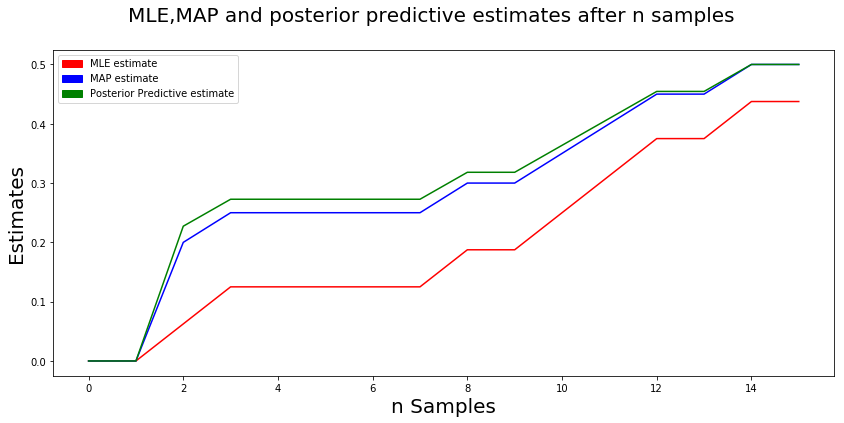

In [88]:
fig1 = plt.figure(figsize=(14,6))
ax1 = fig1.add_subplot(111)
ax1.plot(range(n),theta_mle,"red",range(n),theta_map,"blue",range(n),post_pred,"green")
plt.xlabel("n Samples",fontsize=20)
plt.ylabel("Estimates",fontsize=20)
fig1.suptitle("MLE,MAP and posterior predictive estimates after n samples",fontsize=20)
red = mpatches.Patch(color='red',label="MLE estimate")
blue = mpatches.Patch(color='blue',label="MAP estimate")
green = mpatches.Patch(color='green',label="Posterior Predictive estimate")
ax1.legend(handles=[red,blue,green],loc=2)

In [140]:
thetas = np.array(range(101))
thetas = thetas/float(100)
thetas

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [44]:
reset_selective beta

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [ ]:
thetas = 

In [141]:
n1=0
n0=0
alpha = 4
bet = 2
distributions = []
posteriors = []
for theta in thetas:
    posterior = beta.pdf(theta,alpha,bet)
    posteriors.append(posterior)
distributions.append(posteriors)
for d in D:
    posteriors = []
    if d==1:
        n1 = float(n1)+1
    else:
        n0=float(n0)+1
    for theta in thetas:
        #numerator = theta**(alpha-1)*(1-theta)**(bet-1)
        #z = (beta.pdf(a=4+n1 , b=2+n0))
        #posterior = numerator/z
        posterior = beta.pdf(theta,(n1+alpha),(n0+bet))
        posteriors.append(posterior)
    distributions.append(posteriors)


In [142]:
dists = pd.DataFrame(distributions)
dists


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,1.980000e-05,1.568000e-04,5.238000e-04,1.228800e-03,2.375000e-03,4.060800e-03,0.006380,0.009421,0.013268,...,1.356428,1.245901,1.126100,0.996701,8.573750e-01,7.077888e-01,5.476038e-01,3.764768e-01,1.940598e-01,0.0
1,0.0,5.880600e-05,4.609920e-04,1.524258e-03,3.538944e-03,6.768750e-03,1.145146e-02,0.017800,0.026001,0.036221,...,0.366236,0.299016,0.236481,0.179406,1.286063e-01,8.493466e-02,4.928434e-02,2.258861e-02,5.821794e-03,0.0
2,0.0,1.358419e-04,1.054135e-03,3.449904e-03,7.927235e-03,1.500406e-02,2.511686e-02,0.038625,0.055816,0.076909,...,0.076909,0.055816,0.038625,0.025117,1.500406e-02,7.927235e-03,3.449904e-03,1.054135e-03,1.358419e-04,0.0
3,0.0,2.716837e-06,4.216540e-05,2.069942e-04,6.341788e-04,1.500406e-03,3.014023e-03,0.005408,0.008931,0.013844,...,0.139975,0.102702,0.071843,0.047220,2.850772e-02,1.522029e-02,6.692814e-03,2.066105e-03,2.689669e-04,0.0
4,0.0,4.890307e-08,1.517954e-06,1.117769e-05,4.566087e-05,1.350366e-04,3.255145e-04,0.000681,0.001286,0.002243,...,0.229279,0.170075,0.120265,0.079896,4.874820e-02,2.630066e-02,1.168565e-02,3.644609e-03,4.792990e-04,0.0
5,0.0,1.210351e-07,3.718988e-06,2.710590e-05,1.095861e-04,3.207118e-04,7.649591e-04,0.001584,0.002958,0.005102,...,0.051588,0.034015,0.021046,0.011984,6.093525e-03,2.630066e-03,8.764239e-04,1.822304e-04,1.198247e-05,0.0
6,0.0,2.636144e-07,8.018139e-06,5.784398e-05,2.314458e-04,6.702877e-04,1.581935e-03,0.003241,0.005987,0.010214,...,0.010214,0.005987,0.003241,0.001582,6.702877e-04,2.314458e-04,5.784398e-05,8.018139e-06,2.636144e-07,0.0
7,0.0,5.219566e-07,1.571555e-05,1.122173e-04,4.443760e-04,1.273547e-03,2.974039e-03,0.006029,0.011015,0.018590,...,0.001839,0.000958,0.000454,0.000190,6.702877e-05,1.851567e-05,3.470639e-06,3.207256e-07,5.272289e-09,0.0
8,0.0,9.596545e-07,2.860231e-05,2.021515e-04,7.922589e-04,2.246900e-03,5.191822e-03,0.010412,0.018821,0.031417,...,0.000307,0.000142,0.000059,0.000021,6.224100e-06,1.375449e-06,1.933642e-07,1.191266e-08,9.791394e-11,0.0
9,0.0,2.239194e-08,1.334774e-06,1.415060e-05,7.394416e-05,2.621384e-04,7.268550e-04,0.001701,0.003513,0.006598,...,0.000653,0.000305,0.000128,0.000046,1.379676e-05,3.081007e-06,4.376476e-07,2.724029e-08,2.261812e-10,0.0


In [137]:
dists[4]

0     0.768000
1     1.382400
2     1.935360
3     1.548288
4     1.114767
5     1.672151
6     2.207239
7     2.648687
8     2.951394
9     2.754635
10    3.098964
11    2.833339
12    2.408338
13    1.926670
14    2.440449
15    1.952359
16    2.459973
Name: 4, dtype: float64

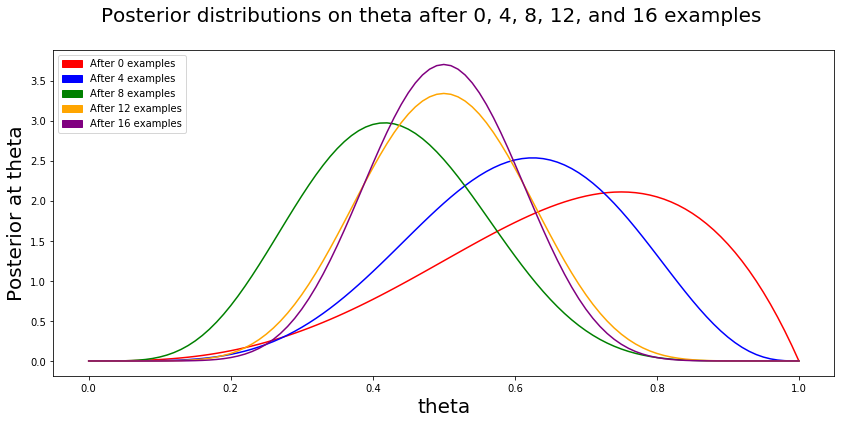

In [147]:
fig2 = plt.figure(figsize=(14,6))
ax1 = fig2.add_subplot(111)
ax1.plot(thetas,dists.loc[0],'red')
ax1.plot(thetas,dists.loc[4],'blue')
ax1.plot(thetas,dists.loc[8],'green')
ax1.plot(thetas,dists.loc[12],'orange')
ax1.plot(thetas,dists.loc[16],'purple')
plt.xlabel("theta",fontsize=20)
plt.ylabel("Posterior at theta",fontsize=20)
plt.suptitle("Posterior distributions on theta after 0, 4, 8, 12, and 16 examples",fontsize=20)
red = mpatches.Patch(color='red',label="After 0 examples")
blue = mpatches.Patch(color='blue',label="After 4 examples")
green = mpatches.Patch(color='green',label="After 8 examples")
orange = mpatches.Patch(color='orange',label="After 12 examples")
purple = mpatches.Patch(color='purple',label="After 16 examples")
plt.legend(handles=[red,blue,green,orange,purple],loc=2)
plt.show()